# *Satish Ghosle*
# *Real Time Linear Regression ML Model*

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
insurance_df = pd.read_excel("/kaggle/input/insurance.xlsx")
insurance_df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [86]:
insurance_df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [87]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<Axes: >

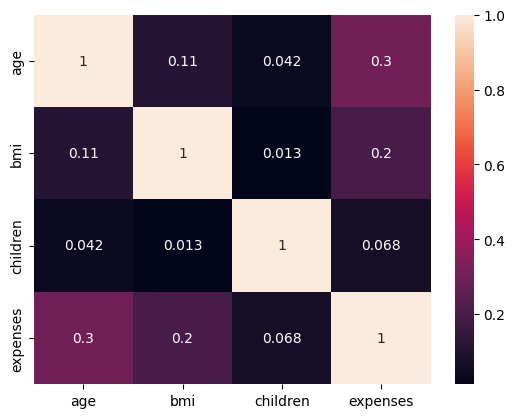

In [88]:
sns.heatmap(insurance_df.select_dtypes(np.number).corr(), annot = True)

## Save Objects

In [89]:
import pickle

def save_operations(obj,name):
    pickle_obj = open(f"/kaggle/working/{name}.pck","wb+")
    pickle.dump(obj, pickle_obj)
    pickle_obj.close()

In [90]:
insurance_df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

In [91]:
d_types_dict = dict(insurance_df.dtypes)
d_types_dict

{'age': dtype('int64'),
 'sex': dtype('O'),
 'bmi': dtype('float64'),
 'children': dtype('int64'),
 'smoker': dtype('O'),
 'region': dtype('O'),
 'expenses': dtype('float64')}

In [92]:
for col_name, dtype in d_types_dict.items():
    if dtype == "object":
        print(col_name)

sex
smoker
region


### Encodings

In [93]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
le_obj = LabelEncoder()
insurance_df["sex"] = le_obj.fit_transform(insurance_df.sex)
save_operations(le_obj,"sex_Label_Enc")

# Hence saving SMOKER'S le_object seperately.
insurance_df["smoker"] = le_obj.fit_transform(insurance_df.smoker)
save_operations(le_obj,"smoker_Label_Enc")



In [94]:
from sklearn.preprocessing import OneHotEncoder
ohe_obj  = OneHotEncoder()
data = ohe_obj.fit_transform(insurance_df.region.to_frame())
data.toarray()

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [95]:
data = ohe_obj.fit_transform(insurance_df.region.values.reshape(-1,1)).toarray()
data

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [96]:
# We will name the region columns as we want and save the column name and order for 
#future prediction

region_df = pd.DataFrame(data, columns=["region_1","region_2", "region_3", "region_4"])#.astype("int")
save_operations(ohe_obj, "Region_ohe_Enc")
region_df

,region_1,region_2,region_3,region_4
0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0
...,...,...,...,...
1333,0.0,1.0,0.0,0.0
1334,1.0,0.0,0.0,0.0
1335,0.0,0.0,1.0,0.0
1336,0.0,0.0,0.0,1.0


In [97]:
insurance_df.drop("region", axis = 1, inplace = True)
insurance_df = pd.concat((insurance_df, region_df), axis = 1)
insurance_df

,age,sex,bmi,children,smoker,expenses,region_1,region_2,region_3,region_4
0,19,0,27.9,0,1,16884.92,0.0,0.0,0.0,1.0
1,18,1,33.8,1,0,1725.55,0.0,0.0,1.0,0.0
2,28,1,33.0,3,0,4449.46,0.0,0.0,1.0,0.0
3,33,1,22.7,0,0,21984.47,0.0,1.0,0.0,0.0
4,32,1,28.9,0,0,3866.86,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,10600.55,0.0,1.0,0.0,0.0
1334,18,0,31.9,0,0,2205.98,1.0,0.0,0.0,0.0
1335,18,0,36.9,0,0,1629.83,0.0,0.0,1.0,0.0
1336,21,0,25.8,0,0,2007.95,0.0,0.0,0.0,1.0


### Data Transformation

In [98]:
insurance_df["expenses"].skew()

1.51587966289798

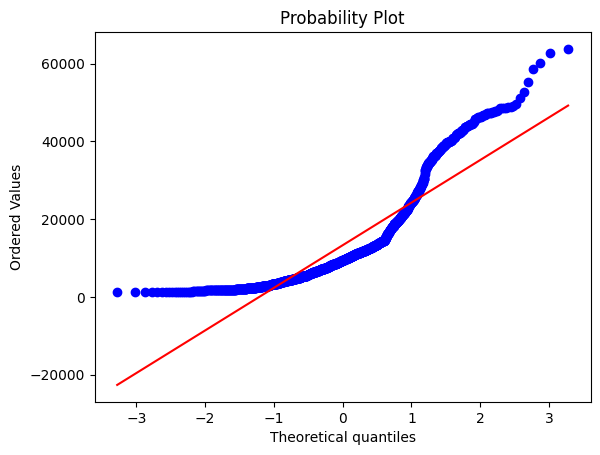

In [99]:
from scipy import stats
res = stats.probplot(insurance_df.expenses, plot = plt)

(array([ 46., 105., 101., 155., 198., 283., 156., 123., 115.,  56.]),
 array([ 7.02275221,  7.42678148,  7.83081075,  8.23484002,  8.63886928,
         9.04289855,  9.44692782,  9.85095708, 10.25498635, 10.65901562,
        11.06304488]),
 <BarContainer object of 10 artists>)

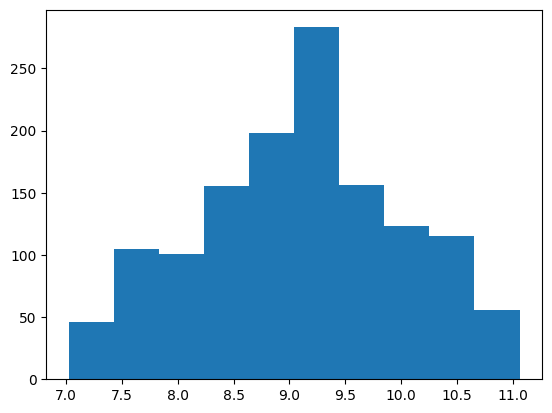

In [100]:
expense_log_arr = np.log(insurance_df.expenses)
plt.hist(expense_log_arr)

Lambda = 0.04364901334818232


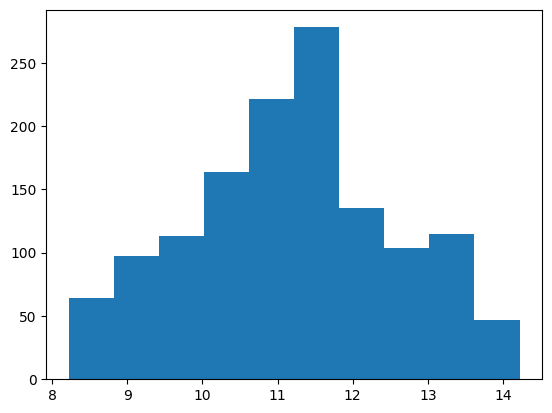

In [101]:
from scipy.stats import boxcox
boxcox_arr, lam = boxcox(insurance_df.expenses)
plt.hist(boxcox_arr)

save_operations(lam,"lam_boxcox_expenses")
print("Lambda =", lam)

In [102]:
insurance_df.drop("expenses", axis = 1, inplace = True)

In [103]:
independent_cols = insurance_df.columns
dependent_col = boxcox_arr

### Save columns for future predictions.

In [104]:
save_operations(independent_cols,"Independent_Columns")

### Data Splitting

In [105]:
X = insurance_df[independent_cols]
Y = dependent_col

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
std_scaler_obj = StandardScaler()

# X = std_scaler_obj.fit_transform(X)
# Save Standard Scaler Object

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 4)

X_train = std_scaler_obj.fit_transform(X_train)
X_test = std_scaler_obj.fit_transform(X_test)
save_operations(std_scaler_obj,"Std_Scaler_Obj")

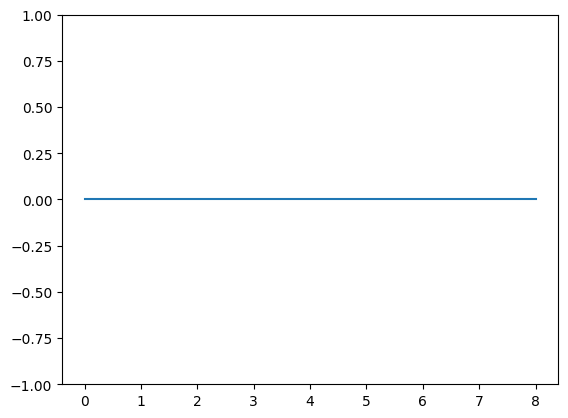

In [107]:
# Check if Mean = 0 in either Train or Test set

mean = []
plt.ylim(-1,1)
for i in range(X.shape[1]):
    mean.append(np.mean(X_test[:,i]))
 
plt.plot(mean)

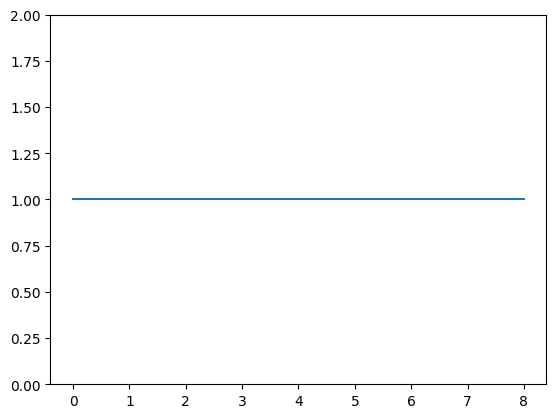

In [108]:
# Check if Standard Deviation = 1 in either Train or Test set

std_dev = []
plt.ylim(0,2)
for i in range(X.shape[1]):
    std_dev.append(np.std(X_train[:,i]))
    
plt.plot(std_dev)

In [109]:
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

pca_obj = PCA(n_components = 7)
X_train = pca_obj.fit_transform(X_train)
X_test = pca_obj.transform(X_test)

save_operations(pca_obj, "PCA_Obj")
pca_obj.explained_variance_ratio_.cumsum()

array([0.17706185, 0.32458986, 0.47200555, 0.59469268, 0.71153729,
       0.81727571, 0.91598789])

In [110]:
def cal_mae(y_test,y_pred):
    absolute_error = np.sum(abs(y_test-y_pred))
    mae = absolute_error/len(y_test)
    return mae

def cal_rmse(y_test, y_pred):
    square_error = np.sum((y_test - y_pred)**2)
    mse = square_error/len(y_test)
    rmse = np.sqrt(mse)
    return rmse

def cal_r_squared(y_test, y_pred):
    SSR = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(y_test))**2)
    r_squared = 1 - (SSR/SST)
    return r_squared

def cal_adj_r_squared(y_test, y_pred, no_of_features):
    numerator = (1 - cal_r_squared(y_test, y_pred)) * (len(y_test)-1)
    denominator = len(y_test) - no_of_features - 1
    adj_r_squared = 1 - (numerator/denominator)
    return adj_r_squared

### Train Model

In [111]:
lr_model_obj = LinearRegression()
lr_model_obj.fit(X_train, Y_train)
Y_pred = lr_model_obj.predict(X_test)

print("Score gf Model =",lr_model_obj.score(X_test, Y_test))
print("MAE = ",cal_mae(Y_test,Y_pred))
print("RMSE =",cal_rmse(Y_test,Y_pred))
print("R2 = ",cal_r_squared(Y_test,Y_pred))
print("Adjusted R2 =",cal_adj_r_squared(Y_test,Y_pred,X_test.shape[1]))

print(f"Linear Regression Model Score = {np.round(lr_model_obj.score(X_test,Y_test),2)*100} %")

Score gf Model = 0.7447360374659324
MAE =  0.45060466563078705
RMSE = 0.6884988848342561
R2 =  0.7447360374659324
Adjusted R2 = 0.7378635461669383
Linear Regression Model Score = 74.0 %


### Finally Save the Linear Regression Model

In [112]:
save_operations(lr_model_obj,"My_LR_Model_Obj")

## Real Time Prediction

In [113]:
import pickle
def load_operations(name):
    pickle_obj = open(f"/kaggle/working/{name}.pck","rb")
    pick_obj = pickle.load(pickle_obj)
    return pick_obj
    

In [114]:
# Load a random row from main Dataset

insurance_df_data = pd.read_excel("/kaggle/input/insurance.xlsx")

random_row_idx = np.random.choice(len(insurance_df_data))
random_row_idx

486

In [115]:
to_be_predicted = insurance_df_data.iloc[random_row_idx,:]
to_be_predicted

age                54
sex            female
bmi              21.5
children            3
smoker             no
region      northwest
expenses     12475.35
Name: 486, dtype: object

In [116]:
pred_dict = dict(to_be_predicted)
pred_dict


{'age': 54,
 'sex': 'female',
 'bmi': 21.5,
 'children': 3,
 'smoker': 'no',
 'region': 'northwest',
 'expenses': 12475.35}

In [117]:
real_value = pred_dict["expenses"]
del pred_dict["expenses"]

### Apply all the transformation

In [118]:
# pred_dict["region"] = load_operations("region_Label_Enc").transform(np.array(pred_dict["region"]).reshape(-1,))

In [119]:
pred_dict["sex"] = load_operations("sex_Label_Enc").transform(np.array(pred_dict["sex"]).reshape(-1,))[0]

In [120]:
pred_dict["smoker"] = load_operations("smoker_Label_Enc").transform(np.array(pred_dict["smoker"]).reshape(-1,1))[0]

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [121]:
pred_dict

{'age': 54,
 'sex': 0,
 'bmi': 21.5,
 'children': 3,
 'smoker': 0,
 'region': 'northwest'}

In [122]:
pred_dict["region"] = load_operations("Region_ohe_Enc").transform(np.array(pred_dict["region"]).reshape(-1,1))
pred_dict["region"] = pred_dict["region"].toarray()

In [123]:
pred_dict["region"][0]

array([0., 1., 0., 0.])

In [124]:
for e, i in enumerate(pred_dict["region"][0]):
    pred_dict["region_"+str(e+1)] = i

In [125]:
pred_dict

{'age': 54,
 'sex': 0,
 'bmi': 21.5,
 'children': 3,
 'smoker': 0,
 'region': array([[0., 1., 0., 0.]]),
 'region_1': 0.0,
 'region_2': 1.0,
 'region_3': 0.0,
 'region_4': 0.0}

In [126]:
del pred_dict["region"]

In [127]:
pred_dict

{'age': 54,
 'sex': 0,
 'bmi': 21.5,
 'children': 3,
 'smoker': 0,
 'region_1': 0.0,
 'region_2': 1.0,
 'region_3': 0.0,
 'region_4': 0.0}

In [128]:
col_seq = load_operations("Independent_Columns")
col_seq

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region_1', 'region_2',
       'region_3', 'region_4'],
      dtype='object')

In [129]:
sequenced_arr = []
for col_name in col_seq:
    sequenced_arr.append(pred_dict[col_name])

In [130]:
sequenced_arr = np.array(sequenced_arr)
print(sequenced_arr)

[54.   0.  21.5  3.   0.   0.   1.   0.   0. ]


In [131]:
print(sequenced_arr.reshape(1,-1))

[[54.   0.  21.5  3.   0.   0.   1.   0.   0. ]]


In [132]:
sequenced_arr = load_operations("Std_Scaler_Obj").transform(sequenced_arr.reshape(1,-1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [133]:
sequenced_arr

array([[ 1.17787067, -1.01503844, -1.45461784,  1.76438556, -0.51975204,
        -0.60033831,  1.78535711, -0.56585956, -0.58309519]])

In [134]:
sequenced_arr = load_operations("PCA_Obj").transform(sequenced_arr)

In [135]:
sequenced_arr

array([[-1.79984503, -0.92022132, -1.6079968 , -0.70487069,  1.30588467,
         0.98487064,  0.94778631]])

In [136]:
prediction = load_operations("My_LR_Model_Obj").predict(sequenced_arr)
prediction

array([11.81291872])

In [137]:
load_operations("lam_boxcox_expenses")

0.04364901334818232

In [138]:
from scipy.special import inv_boxcox

prediction = inv_boxcox(prediction, load_operations("lam_boxcox_expenses"))
prediction

array([13719.67180788])

In [139]:
print("Real Value",real_value)
print("Predicted Value", prediction)

Real Value 12475.35
Predicted Value [13719.67180788]


In [140]:
print(f"Difference =", abs(prediction[0] - real_value))
difference = abs(prediction[0] - real_value)

Difference = 1244.3218078787813


In [141]:
difference_perc = (difference/(abs(prediction[0]) + abs(real_value))) *100
print(f"Difference in percentage = {np.round(difference_perc,4)}%")

Difference in percentage = 4.7502%
